### Tutorial 2: Understanding Probability Distributions

Probability distributions describe how the values of a random variable are distributed. They are categorized into **discrete** and **continuous** distributions, each suited for different types of data. This tutorial provides an overview of some commonly used distributions.

---
### **Discrete Distributions**

| Distribution       | Field of Application                     | Parameters                          | Example Applications                                                                                   |
|--------------------|------------------------------------------|-------------------------------------|-------------------------------------------------------------------------------------------------------|
| **Bernoulli**      | Single success/failure trial             | \(p\): Success probability          | Tossing a coin once, where success is defined as "heads."                                            |
| **Binomial**       | Success/failure analysis                 | \(n\): Number of trials, \(p\): Success probability | Quality control, determining defect rates, or success rates in sampling large populations.           |
| **Multinomial**    | Multiple outcome probabilities           | \(n\): Number of trials, \($\mathbf{p}$\): Vector of probabilities | Rolling a die multiple times and analyzing the frequency of outcomes (e.g., faces of the die).       |
| **Poisson**        | Rare event modeling                      | \($\lambda$\): Average rate of events | Modeling event counts like accidents, breakdowns, or arrival rates (e.g., customers at a store).     |
| **Hypergeometric** | Probability without replacement          | \(N\): Population size, \(K\): Successes in population, \(n\): Sample size | Probability of selecting defective items from a finite population without replacement.               |
| **Geometric**      | Time until first success                 | \(p\): Success probability          | Number of trials required to get the first success in coin toss or similar trials.                   |



---

### **Continuous Distributions**

| Distribution       | Field of Application                     | Parameters                          | Example Applications                                                                                   |
|--------------------|------------------------------------------|-------------------------------------|-------------------------------------------------------------------------------------------------------|
| **Normal**         | Physical properties                     | \($\mu$\): Mean, \($\sigma^2$\): Variance | Material properties, component values (e.g., resistance, capacitance), dimensions, etc.              |
| **Log-Normal**     | Life phenomena with large variations     | \($\mu$\): Log-mean, \($\sigma^2$\): Log-variance | Performance of populations such as car lifespans, light bulbs, etc.                                  |
| **Weibull**        | Failure analysis and reliability         | \(k\): Shape, \($\lambda$\): Scale    | Wear-out failures, survival probability, strength of materials, and failure due to shock or stress.  |
| **Exponential**    | Time between independent events          | \($\lambda$\): Rate parameter         | Time until failure for machines, reliability modeling for non-wear-out failures.                     |
| **Gamma**          | Time to complete multiple events         | \(k\): Shape, \($\theta$\): Scale     | Queue modeling, reliability analysis for systems requiring multiple stages of completion.            |
| **Beta**           | Probabilities or proportions            | \($\alpha$\): Shape, \($\beta$\): Shape | Modeling success rates in experiments, percentages of outcomes within a defined range.               |
| **Uniform**        | Equal likelihood of outcomes             | \(a\): Lower bound, \(b\): Upper bound | Random number generation between 0 and 1.                                                            |
| **Pareto**         | Extreme value distributions              | \($x_m$\): Scale, \($\alpha$\): Shape   | Wealth distribution modeling (e.g., income of the top 1%).                                            |
| **t-Distribution** |Small sample inference	                |$df$: Degrees of freedom               | Estimating confidence intervals and hypothesis testing when the sample size is small or variance is unknown.|




##### Q1: Scenario: (Based on Chap 6, Pg 119, Thomas_2016: Intro to Statistics)

You are a manufacturer of hip implants. The doctor who will use your implants in surgeries has a requirement: he is willing to accept implants that are **1 mm bigger or smaller** than the specified target size. This means the implant sizes must fall within a 2 mm range of the target size, i.e., ±1 mm from the target.

Additionally, your financial officer has stated that in order to maintain profitability, you can afford to discard **1 out of every 1000 implants**. This means that the size distribution of your implants must be such that only 0.1% of implants fall outside the acceptable ±1 mm range.

**Given the recent 1000 samples from the plant, check if the factory is in loss?**


Target size: 32.01
stadard deviation: 0.41
Number of defects: 13
Number of samples: 1000


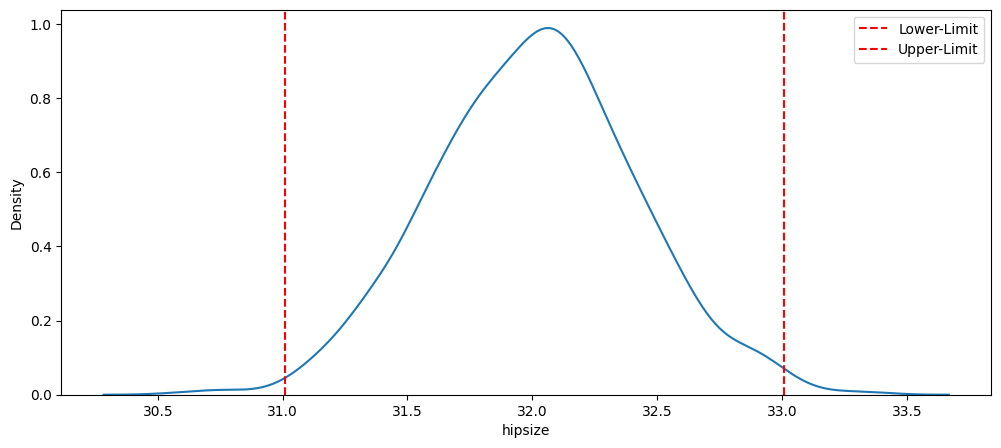

Defect Rate: 0.0130
The factory is at a loss.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

df_hip = pd.read_csv('./data/hipsize_table.csv')

hip_mean = df_hip['hipsize'].mean().round(2)
hip_stddev = df_hip['hipsize'].std().round(2)
defect = df_hip[((df_hip['hipsize']<hip_mean-1) | (df_hip['hipsize']>hip_mean+1))]
print('Target size:', hip_mean)
print('stadard deviation:', hip_stddev)
print('Number of defects:', defect.shape[0])
print('Number of samples:', df_hip.shape[0])

plt.figure(figsize = (12,5))
sns.kdeplot(data = df_hip, x = 'hipsize')
plt.axvline(x = hip_mean-1, ymin = 0, ymax = 1, color = 'red', linestyle = '--', label = 'Lower-Limit')
plt.axvline(x = hip_mean+1, ymin = 0, ymax = 1, color = 'red', linestyle = '--', label = 'Upper-Limit')

plt.legend()
plt.show()

defect_rate = defect.shape[0] / df_hip.shape[0]
print(f'Defect Rate: {defect_rate:.4f}')
if defect_rate > 0.001:
    print('The factory is at a loss.')
else:
    print('The factory is not at a loss.')



##### Q2: Scenario: (Based on Chap 6, Pg 119, Thomas_2016: Intro to Statistics)

The research about pure blue eyes provides the following table. 

| Country/Region                          | Frequency of Blue Eyes (%) |
|-----------------------------------------|----------------------------|
| Finland, Sweden, Norway                 | 72%                        |
| Estonia, Denmark                        | 69%                        |
| Latvia, Ireland                         | 66%                        |
| Scotland                                | 63%                        |
| Lithuania                               | 61%                        |
| The Netherlands                         | 58%                        |
| Belarus, England                        | 55%                        |
| Germany                                 | 53%                        |
| Poland, Wales                           | 50%                        |
| Russia, The Czech Republic              | 48%                        |
| Slovakia                                | 46%                        |
| Belgium                                 | 43%                        |
| Austria, Switzerland, Ukraine           | 37%                        |
| France, Slovenia                        | 34%                        |
| Hungary                                 | 28%                        |
| Croatia                                 | 26%                        |
| Bosnia and Herzegovina                  | 24%                        |
| Romania                                 | 20%                        |
| Italy                                   | 18%                        |
| Serbia, Bulgaria                        | 17%                        |
| Spain                                   | 15%                        |
| Georgia, Portugal                       | 13%                        |
| Albania                                 | 11%                        |
| Turkey, Greece                          | 10%                        |
| **Average (Europe)**                    | 34%                        |
| **Average (Northern Europe)**           | 50%                        |
| **Average (Southern Europe)**           | 18%                        |


**If we have 15 Austrian students in the classroom, what is the chance of finding three, six, or ten students with blue eyes?**


3 students having blue eyes: 9.01
6 students having blue eyes: 20.0
10 students having blue eyes: 1.43


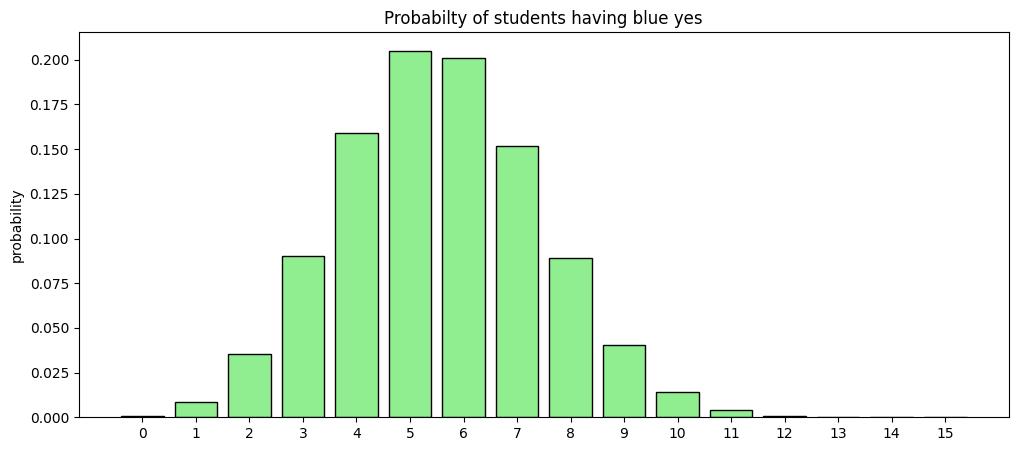

In [97]:
import scipy.stats as stats

n = 15
p = 0.37
n_stus = np.arange(0,16)
binomial_probs = stats.binom.pmf(n_stus, n, p)
print('3 students having blue eyes:' , 100*np.round(binomial_probs[3],4))
print('6 students having blue eyes:', 100*np.round(binomial_probs[6],2))
print('10 students having blue eyes:', 100*np.round(binomial_probs[10],4))
plt.figure(figsize = (12,5))
plt.bar(n_stus, binomial_probs, color = 'lightgreen', edgecolor = 'black')
plt.ylabel('Number of students with blue eyes')
plt.ylabel('probability')
plt.xticks(n_stus)
plt.title('Probabilty of students having blue yes')
plt.show()

##### Q3: Scenario: (Based on Chap 6, Pg 119, Thomas_2016: Intro to Statistics)
In 2012 there were 62 fatal accidents on streets in Austria.
Assuming that those are evenly distributed, we have on average 1.19 fatal accidents per week. How big is the chance that in a given week there are no, two, or five accidents?

No accidents: 30.42
2 Accident: 22.0
5 Accidents: 0.6


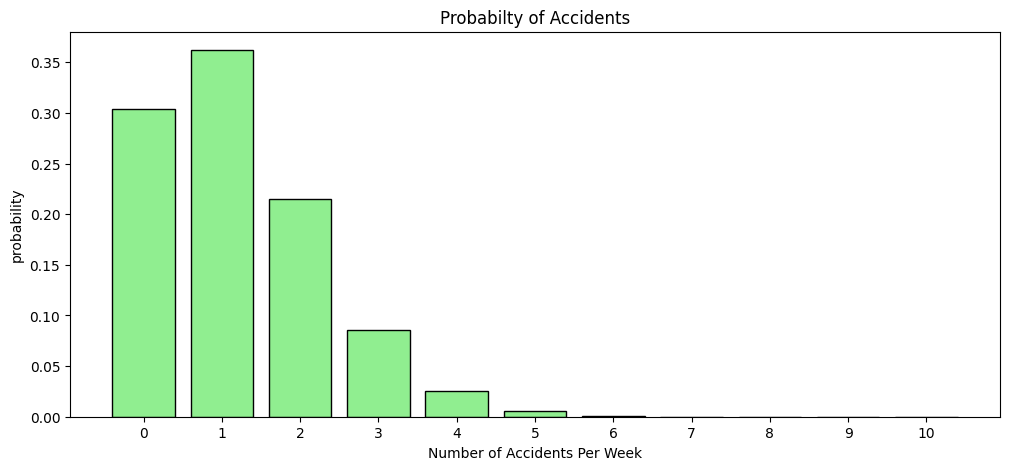

In [99]:
a_lambda = 1.19
data = np.arange(0, 11)
poissson_pmf = stats.poisson.pmf(data, a_lambda)

print('No accidents:' , 100*np.round(poissson_pmf[0],4))
print('2 Accident:', 100*np.round(poissson_pmf[2],2))
print('5 Accidents:', 100*np.round(poissson_pmf[5],4))

plt.figure(figsize = (12,5))
plt.bar(data, poissson_pmf, color = 'lightgreen', edgecolor = 'black')
plt.xlabel('Number of Accidents Per Week')
plt.ylabel('probability')
plt.xticks(data)
plt.title('Probabilty of Accidents')
plt.show()